In [1]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [36]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2023-11-09 17:32:45--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.2.33, 104.26.3.33, 172.67.70.149, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.2.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv.1’

insurance.csv.1     100%[===================>]  49.09K  --.-KB/s    in 0.01s   

2023-11-09 17:32:45 (4.54 MB/s) - ‘insurance.csv.1’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [14]:
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import LabelEncoder
# Create a LabelEncoder
label_encoder = LabelEncoder()

In [39]:
filtered_columns = [column for column in dataset.columns if dataset[column].dtype == 'object']
for col in filtered_columns:
  dataset[col] = label_encoder.fit_transform(dataset[col])

In [40]:
dataset.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
expenses    float64
dtype: object

In [41]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [42]:
train_labels=train_dataset.pop('expenses')
test_labels=test_dataset.pop('expenses')


In [72]:
normalizer=layers.Normalization(axis=-1)
normalizer.adapt(train_dataset)


In [80]:
model = tf.keras.Sequential([
    normalizer,
    layers.Dense(64, activation='relu', input_shape=(6,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # For regression, one output neuron
])

In [81]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error', metrics=['mean_absolute_error', 'mean_squared_error'])

In [82]:
history = model.fit(
    train_dataset,
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

In [83]:
model.evaluate(test_dataset, test_labels, verbose=2)

9/9 - 0s - loss: 2226.3420 - mean_absolute_error: 2226.3420 - mean_squared_error: 31877144.0000 - 35ms/epoch - 4ms/step


[2226.342041015625, 2226.342041015625, 31877144.0]

9/9 - 0s - loss: 2226.3420 - mean_absolute_error: 2226.3420 - mean_squared_error: 31877144.0000 - 54ms/epoch - 6ms/step
Testing set Mean Abs Error: 2226.34 expenses
You passed the challenge. Great job!
9/9 [==============================] - 0s 3ms/step


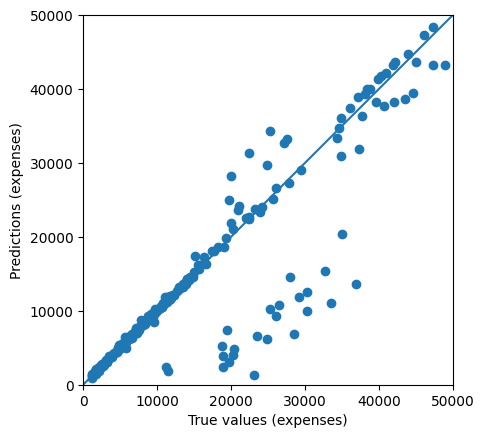

In [84]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
